In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['svg.fonttype'] = 'none'


In [2]:
sa_compare = {'sprot_human': (217, 2769, 1237), 'IGC': (2399, 40569, 9345), 
              'sprot_all': (835, 7454, 3625), 'sprot_bacteria_human': (446, 8006, 3605), 
              'trypsin': (1345, 148060, 2607), 'chymo': (4983, 82108, 38592), 
              'lysc': (591, 82497, 2593), 'gluc': (1837, 54957, 29416), 'davis': (482, 33502, 3943)}

pcc_compare = {'sprot_human': (258, 2686, 1330), 'IGC': (2218, 40191, 10701), 
               'sprot_all': (889, 7241, 3517), 'sprot_bacteria_human': (1047, 7256, 3156), 
               'trypsin': (2104, 147309, 3051), 'chymo': (9169, 84147, 32565), 
               'lysc': (1163, 81839, 3041), 'gluc': (3177, 55886, 26273), 
               'davis': (711, 32351, 5066)}


In [6]:
pdeep_prosit_compare = {'sprot_human': (151, 3906, 657), 'IGC': (1109, 51049, 4125), 'sprot_all': (562, 11347, 1530), 'sprot_bacteria_human': (615, 11182, 1474), 'trypsin': (2820, 148079, 2555), 'chymo': (4630, 129108, 5978), 'lysc': (764, 84649, 1370), 'gluc': (1567, 87985, 3809), 'davis': (1494, 36673, 744)}

prosit_prosit_compare = {'sprot_human': (170, 4208, 536), 'IGC': (945, 53414, 2889), 'sprot_all': (534, 12520, 1372), 'sprot_bacteria_human': (358, 12442, 1378), 'trypsin': (2652, 148442, 2225), 'chymo': (3307, 131845, 5804), 'lysc': (687, 84926, 1159), 'gluc': (1250, 89268, 3588), 'davis': (323, 38004, 554)}

In [7]:
def number2str(num, interal=3):
    new_num = []
    for i, s in enumerate(str(num)[::-1]):
        if i!=0 and i%interal == 0:
            new_num.append(",")
        new_num.append(s)
    return "".join(new_num[::-1])
    
def autolabel(rects, ax, numbers, percent_number, mode="inside", fontsize=12, select_idx=None, inside_height=0.35):
    assert len(rects) == len(numbers)
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        if select_idx is not None and idx not in select_idx:
            continue
        if mode == 'inside':
            ax.text(rect.get_x() + rect.get_width()/2., inside_height*height + rect.get_y(),
                    number2str(numbers[idx]) + f"({percent_number[idx]:.1f}%)",
                    ha='center', va='bottom', rotation=90, color='white', fontsize=fontsize)
        if mode == 'upper':
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y() + height + 3,
                    number2str(numbers[idx]) + f"({percent_number[idx]:.1f}%)",
                    ha='center', va='bottom', rotation=90, color='black', fontsize=fontsize)
        if mode == 'bottom':
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y()+height,
                    number2str(numbers[idx]) + f"({percent_number[idx]:.1f}%)",
                    ha='center', va='top', rotation=90, color='black', fontsize=fontsize)


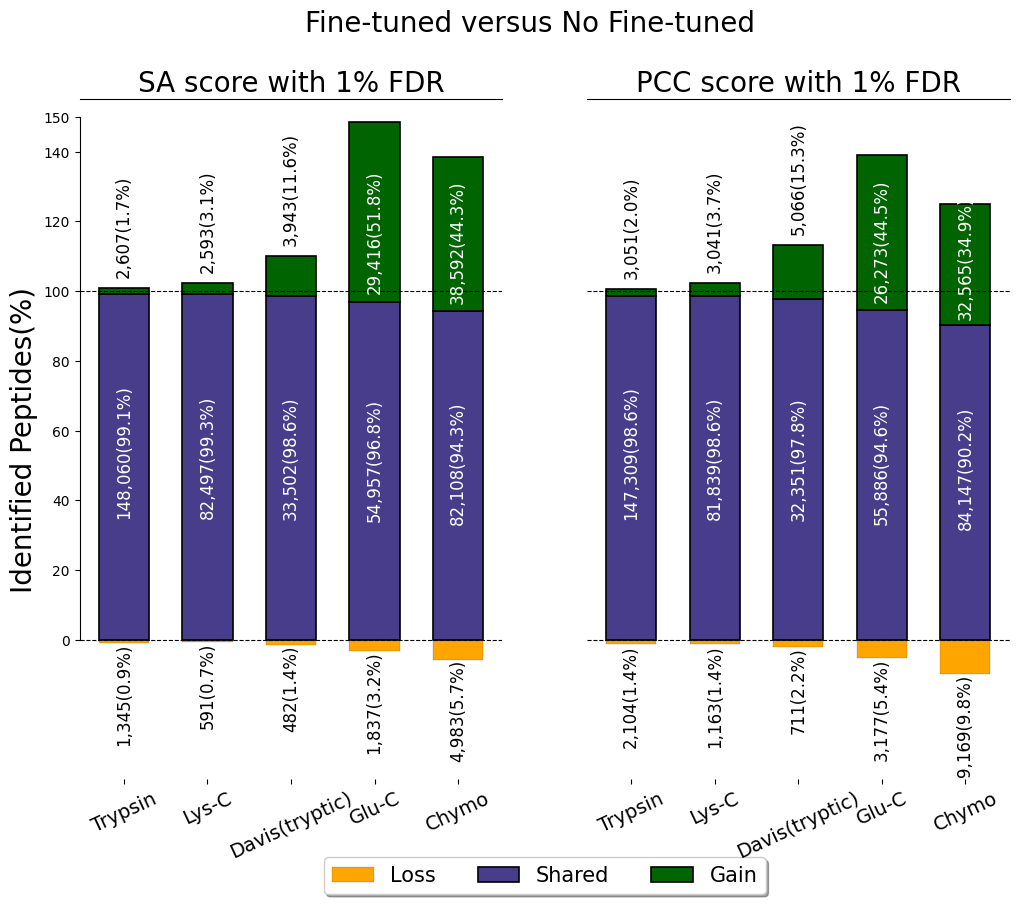

In [8]:
from matplotlib.patches import FancyBboxPatch
labels = ["trypsin", 'lysc', "davis", 'gluc', 'chymo']
show_labels = ["Trypsin", 'Lys-C', "Davis(tryptic)", 'Glu-C', 'Chymo']
losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['SA score'] = [-sa_compare[l][0]/sum(sa_compare[l][:2])*100 for l in labels]
shares['SA score'] = [sa_compare[l][1]/sum(sa_compare[l][:2])*100 for l in labels]
gains['SA score'] = [sa_compare[l][2]/sum(sa_compare[l][:2])*100 for l in labels]

losses_num['SA score'] = [sa_compare[l][0] for l in labels]
shares_num['SA score'] = [sa_compare[l][1] for l in labels]
gains_num['SA score'] = [sa_compare[l][2] for l in labels]

losses['PCC score'] = [-pcc_compare[l][0]/sum(pcc_compare[l][:2])*100 for l in labels]
shares['PCC score'] = [pcc_compare[l][1]/sum(pcc_compare[l][:2])*100 for l in labels]
gains['PCC score'] = [pcc_compare[l][2]/sum(pcc_compare[l][:2])*100 for l in labels]

losses_num['PCC score'] = [pcc_compare[l][0] for l in labels]
shares_num['PCC score'] = [pcc_compare[l][1] for l in labels]
gains_num['PCC score'] = [pcc_compare[l][2] for l in labels]

width = 0.6

names = ['SA score', 'PCC score']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = [i[0].capitalize() + i[1:] for i in labels]
for i, (name, ax) in enumerate(zip(names, axs)):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(show_labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(show_labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(show_labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 12
    autolabel(p1, ax, losses_num[name], [abs(i) for i in losses[name]], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], shares[name],fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name],mode='upper',
            select_idx=[0, 1, 2], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name],mode='inside',
            select_idx=[3, 4], fontsize=num_size, inside_height=0.05)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.1),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{name} with 1% FDR', fontsize=20)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(8)] + [150])
        ax.spines['left'].set_bounds(0, 150)
    else:
        ax.get_yaxis().set_ticks([])
        ax.spines['left'].set_visible(False)
    ax.set_ylim(-40, 155)
    # ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', labelsize=14, rotation=25)

# fig.autofmt_xdate(rotation=15)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
fig.savefig(f"figs/fig2-bekker-sa-pcc-vennbar.svg",dpi=300, bbox_inches="tight")


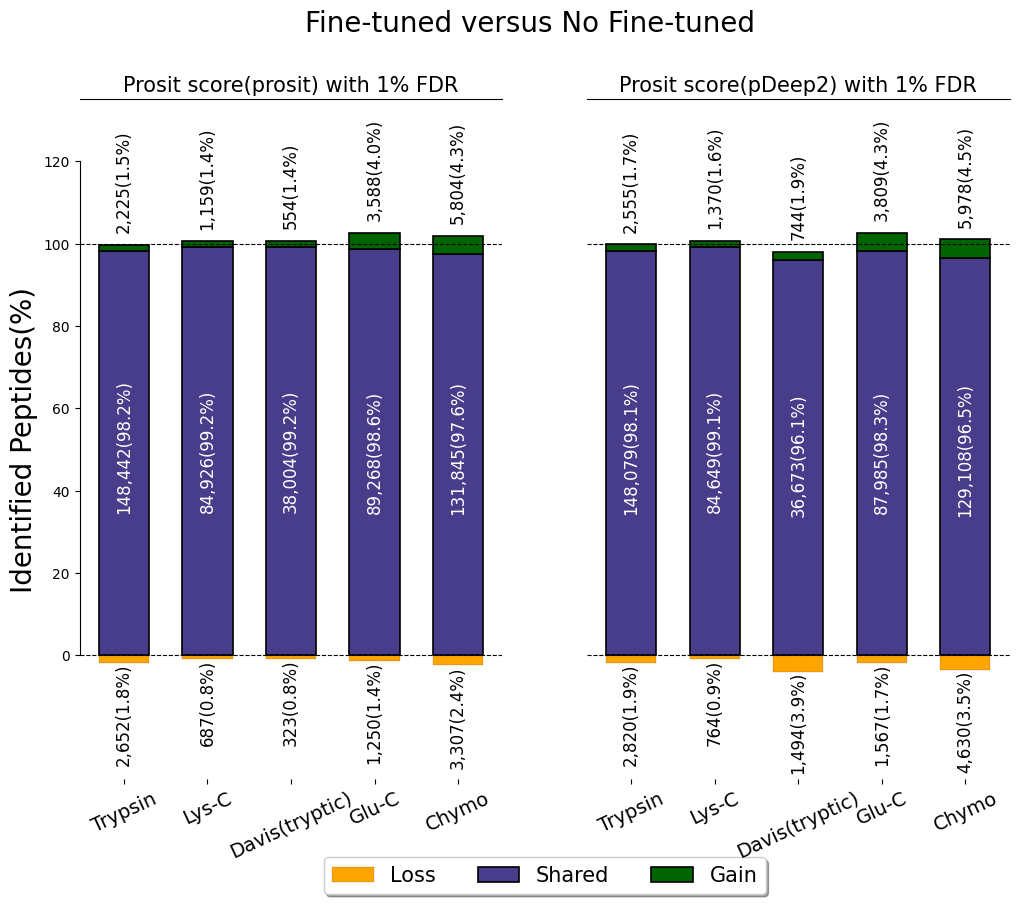

In [9]:
from matplotlib.patches import FancyBboxPatch
labels = ["trypsin", 'lysc', "davis", 'gluc', 'chymo']
show_labels = ["Trypsin", 'Lys-C', "Davis(tryptic)", 'Glu-C', 'Chymo']

losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['Prosit4prosit'] = [-prosit_prosit_compare[l]
                      [0]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4prosit'] = [prosit_prosit_compare[l]
                      [1]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4prosit'] = [prosit_prosit_compare[l][2] /
                     sum(prosit_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4prosit'] = [prosit_prosit_compare[l][0] for l in labels]
shares_num['Prosit4prosit'] = [prosit_prosit_compare[l][1] for l in labels]
gains_num['Prosit4prosit'] = [prosit_prosit_compare[l][2] for l in labels]

losses['Prosit4pDeep'] = [-pdeep_prosit_compare[l][0] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4pDeep'] = [pdeep_prosit_compare[l]
                             [2]/sum(pdeep_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][0] for l in labels]
shares_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] for l in labels]
gains_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][2] for l in labels]

width = 0.6

names = ['Prosit4prosit', 'Prosit4pDeep']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = [i[0].capitalize() + i[1:] for i in labels]
for i, (name, ax, show_name) in enumerate(zip(names, axs, ["Prosit score(prosit)", "Prosit score(pDeep2)"])):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(show_labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(show_labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(show_labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 12
    autolabel(p1, ax, losses_num[name], [abs(i) for i in losses[name]], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], shares[name],fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name], mode='upper', fontsize=num_size)
    # autolabel(p3, ax, gains_num[name], mode='inside',
    #         select_idx=[1, 3], fontsize=num_size)

    if i == 0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.1),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{show_name} with 1% FDR', fontsize=15)
    if i == 0:
        ax.get_yaxis().set_ticks([20 * i for i in range(7)])
        ax.spines['left'].set_bounds(0, 120)
    else:
        ax.get_yaxis().set_ticks([])
        ax.spines['left'].set_visible(False)
    ax.set_ylim(-30, 135)
    # ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', labelsize=14, rotation=25)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
fig.savefig(f"figs/fig2-bekker-prosit-pdeep-vennbar.svg",dpi=300, bbox_inches="tight")

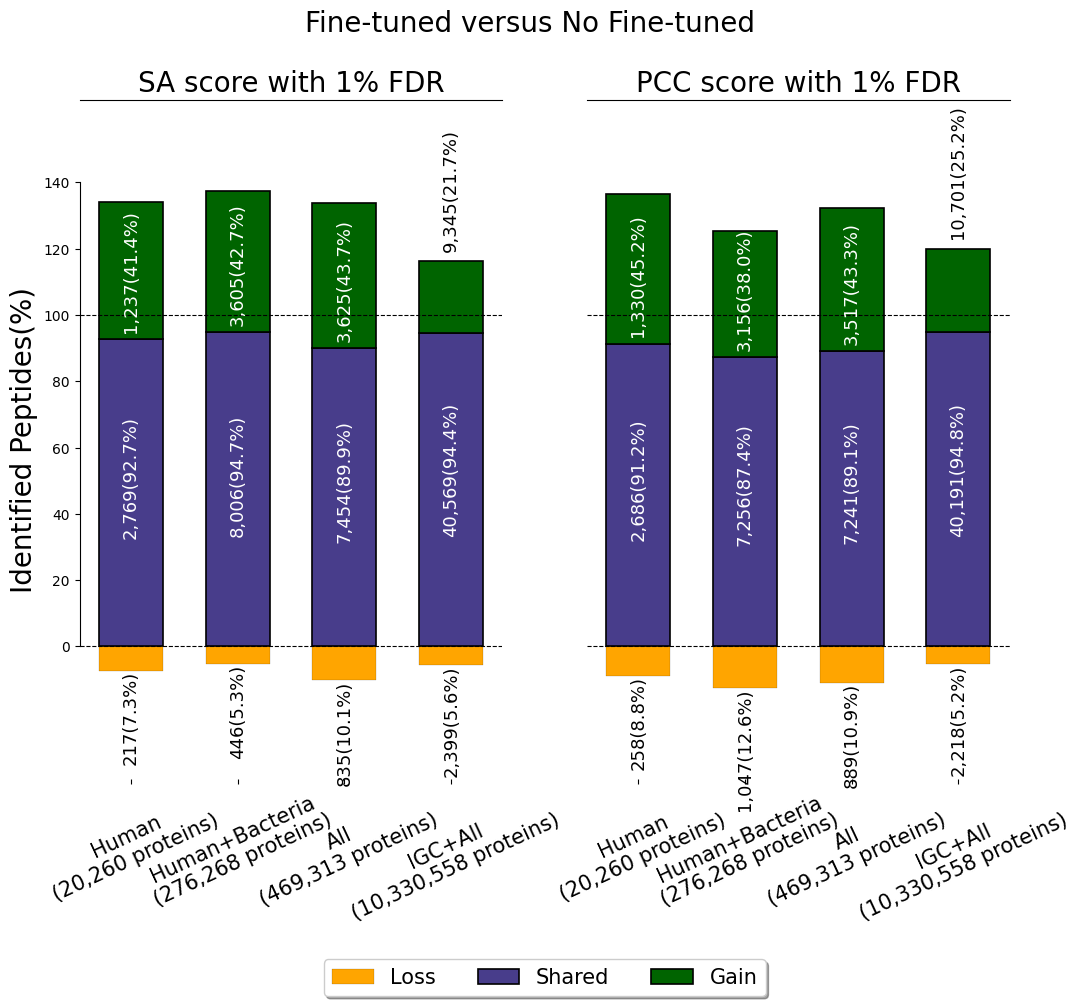

In [10]:
from matplotlib.patches import FancyBboxPatch
labels = ["sprot_human", 'sprot_bacteria_human', 'sprot_all', 'IGC', ]

losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['SA score'] = [-sa_compare[l][0]/sum(sa_compare[l][:2])*100 for l in labels]
shares['SA score'] = [sa_compare[l][1]/sum(sa_compare[l][:2])*100 for l in labels]
gains['SA score'] = [sa_compare[l][2]/sum(sa_compare[l][:2])*100 for l in labels]

losses_num['SA score'] = [sa_compare[l][0] for l in labels]
shares_num['SA score'] = [sa_compare[l][1] for l in labels]
gains_num['SA score'] = [sa_compare[l][2] for l in labels]

losses['PCC score'] = [-pcc_compare[l][0]/sum(pcc_compare[l][:2])*100 for l in labels]
shares['PCC score'] = [pcc_compare[l][1]/sum(pcc_compare[l][:2])*100 for l in labels]
gains['PCC score'] = [pcc_compare[l][2]/sum(pcc_compare[l][:2])*100 for l in labels]

losses_num['PCC score'] = [pcc_compare[l][0] for l in labels]
shares_num['PCC score'] = [pcc_compare[l][1] for l in labels]
gains_num['PCC score'] = [pcc_compare[l][2] for l in labels]

width = 0.6

names = ['SA score', 'PCC score']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = ["Human\n(20,260 proteins)", 'Human+Bacteria\n(276,268 proteins)', 'All\n(469,313 proteins)', 'IGC+All\n(10,330,558 proteins)']
for i, (name, ax) in enumerate(zip(names, axs)):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 13
    autolabel(p1, ax, losses_num[name], [abs(i) for i in losses[name]], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], shares[name], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name],mode='upper',
            select_idx=[3], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name], mode='inside', select_idx=[0, 1, 2], fontsize=num_size, inside_height=0.05)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.25),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{name} with 1% FDR', fontsize=20)
    ax.set_ylim(-40, 165)
    # ax.set_xticklabels(ax.get_xticks(), rotation=45)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(8)])
        ax.spines['left'].set_bounds(0, 140)
    else:
        ax.get_yaxis().set_ticks([])
        ax.spines['left'].set_visible(False)
    ax.tick_params(axis='x', labelsize=20)
    # ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', labelsize=15, rotation=25)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
fig.savefig(f"figs/fig2-human-sa-pcc-vennbar.svg",dpi=300, bbox_inches="tight")

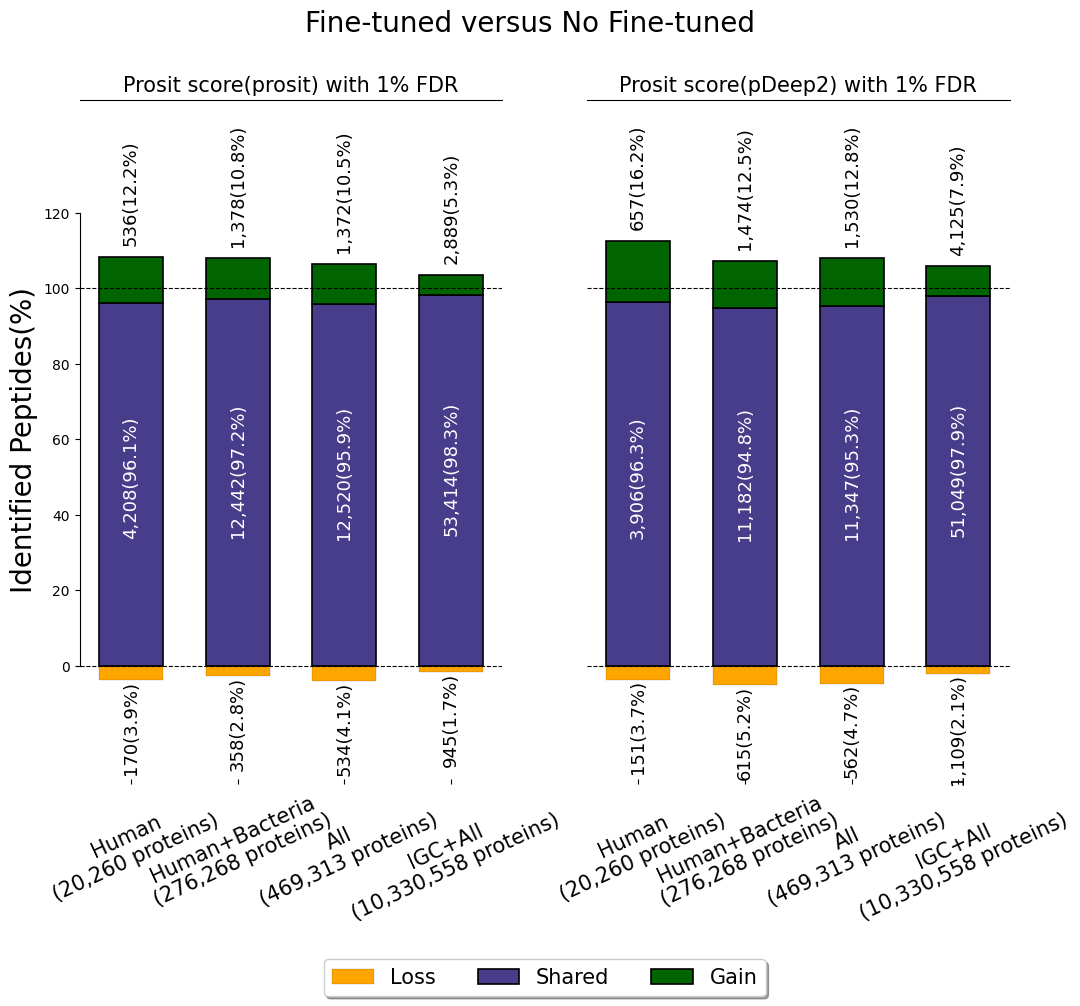

In [11]:
from matplotlib.patches import FancyBboxPatch
labels = ["sprot_human", 'sprot_bacteria_human', 'sprot_all', 'IGC', ]

losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['Prosit4prosit'] = [-prosit_prosit_compare[l]
                      [0]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4prosit'] = [prosit_prosit_compare[l]
                      [1]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4prosit'] = [prosit_prosit_compare[l][2] /
                     sum(prosit_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4prosit'] = [prosit_prosit_compare[l][0] for l in labels]
shares_num['Prosit4prosit'] = [prosit_prosit_compare[l][1] for l in labels]
gains_num['Prosit4prosit'] = [prosit_prosit_compare[l][2] for l in labels]

losses['Prosit4pDeep'] = [-pdeep_prosit_compare[l][0] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4pDeep'] = [pdeep_prosit_compare[l]
                             [2]/sum(pdeep_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][0] for l in labels]
shares_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] for l in labels]
gains_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][2] for l in labels]

width = 0.6

names = ['Prosit4prosit', 'Prosit4pDeep']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = ["Human\n(20,260 proteins)", 'Human+Bacteria\n(276,268 proteins)', 'All\n(469,313 proteins)', 'IGC+All\n(10,330,558 proteins)']
for i, (name, ax, show_name) in enumerate(zip(names, axs, ["Prosit score(prosit)", "Prosit score(pDeep2)"])):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 13
    autolabel(p1, ax, losses_num[name], [abs(i) for i in losses[name]], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], shares[name], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name],mode='upper', fontsize=num_size)
    # autolabel(p3, ax, gains_num[name], mode='inside',
    #         select_idx=[1, 3], fontsize=num_size)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.25),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{show_name} with 1% FDR', fontsize=15)
    ax.set_ylim(-30, 150)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(7)])
        ax.spines['left'].set_bounds(0, 120)
    else:
        ax.get_yaxis().set_ticks([])
        ax.spines['left'].set_visible(False)
    # ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', labelsize=15, rotation=25)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
# fig.autofmt_xdate(rotation=15)
fig.savefig(f"figs/fig2-human-prosit-pdeep-vennbar.svg",dpi=300, bbox_inches="tight")